<h1> <center> 5 - Member Votes </center> </h1> 

**Author:** Sebastião Rosalino, nº 20230372

**Supervisors:** Flávio Pinheiro, António Curado

<div style="text-align: center;">
    <img src="../logos/nova_ims_logo.png" alt="Image 1" style="width: 15%; display: inline-block; margin: 0 10px;"/>
    <img src="../logos/european_parliament_logo.png" alt="Image 2" style="width: 15%; display: inline-block; margin: 0 10px;"/>
</div>

# Table of Contents

1. [Exporting Dataset](#Exporting-Dataset)

In [1]:
# Import the necessary libraries and configurations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle

from matplotlib.ticker import ScalarFormatter

# Suppress all warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the member_votes dataset
member_votes = pd.read_csv('../datasets/first_stage/member_votes.csv')

In [3]:
# Load the id_mep_mapping variable for new MEP-ID assignment
with open('../datasets/second_stage/2_members/id_mep_mapping.pkl', 'rb') as f:
    id_mep_mapping = pickle.load(f)

In [4]:
# Load the id_bill_mapping variable for new bill-ID assignment
with open('../datasets/second_stage/4_bills/id_bill_mapping.pkl', 'rb') as f:
    id_bill_mapping = pickle.load(f)

In [5]:
# Check the shape (number of rows and number of features) of the member_votes dataset
print(f'member_votes number of rows: {member_votes.shape[0]}')
print(f'member_votes number of features: {member_votes.shape[1]}')

member_votes number of rows: 13571176
member_votes number of features: 5


In [6]:
# Check the structural information of the member_votes dataset, including column names, non-null counts, datatypes and size
member_votes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13571176 entries, 0 to 13571175
Data columns (total 5 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   vote_id       int64 
 1   member_id     int64 
 2   position      object
 3   country_code  object
 4   group_code    object
dtypes: int64(2), object(3)
memory usage: 517.7+ MB


In [7]:
# Since the member_votes dataset's size is too large, it was not possible to get the non-null count per column. As a result, let's retrieve that information now
member_votes.isna().sum()

vote_id         0
member_id       0
position        0
country_code    0
group_code      0
dtype: int64

In [8]:
# Check for duplicated rows in the member_votes dataset
duplicates = member_votes.duplicated()

# Display the count of duplicated rows
print(f"Number of duplicated rows in member_votes: {duplicates.sum()}")

Number of duplicated rows in member_votes: 0


In [9]:
# Visualize the member_votes dataset
member_votes

,vote_id,member_id,position,country_code,group_code
0,108425,840,DID_NOT_VOTE,LUX,RENEW
1,108425,1394,AGAINST,GBR,RENEW
2,108425,1854,ABSTENTION,DEU,SD
3,108425,1909,ABSTENTION,DEU,SD
4,108425,1913,ABSTENTION,DEU,SD
...,...,...,...,...,...
13571171,169252,254719,DID_NOT_VOTE,PRT,EPP
13571172,169252,254720,DID_NOT_VOTE,PRT,EPP
13571173,169252,254721,DID_NOT_VOTE,PRT,EPP
13571174,169252,254722,FOR,PRT,EPP


In [10]:
# Replace member_id in member_votes with the previously created id_mep_mapping mapping
member_votes['id_mep'] = member_votes['member_id'].map(id_mep_mapping)

# Drop the old "member_id" column
member_votes.drop("member_id", inplace=True, axis=1)

# Display the updated dataset to verify changes
member_votes

,vote_id,position,country_code,group_code,id_mep
0,108425,DID_NOT_VOTE,LUX,RENEW,0
1,108425,AGAINST,GBR,RENEW,1
2,108425,ABSTENTION,DEU,SD,2
3,108425,ABSTENTION,DEU,SD,4
4,108425,ABSTENTION,DEU,SD,5
...,...,...,...,...,...
13571171,169252,DID_NOT_VOTE,PRT,EPP,868
13571172,169252,DID_NOT_VOTE,PRT,EPP,869
13571173,169252,DID_NOT_VOTE,PRT,EPP,870
13571174,169252,FOR,PRT,EPP,871


In [11]:
# Replace vote_id in member_votes with the previously created id_bill_mapping mapping
member_votes['id_bill'] = member_votes['vote_id'].map(id_bill_mapping)

# Remove the bills whose id_bill was not assigned in the mapping conversion, as these are non-interesting bills as explained in 4_bills.ipynb
member_votes = member_votes.dropna(subset=['id_bill'])

# Convert the id_bill column to integer type
member_votes['id_bill'] = member_votes['id_bill'].astype('int64')

# Drop the old "vote_id" column
member_votes.drop("vote_id", inplace=True, axis=1)

# Display the updated dataset to verify changes
member_votes

,position,country_code,group_code,id_mep,id_bill
2253,FOR,LUX,RENEW,0,0
2254,FOR,GBR,RENEW,1,0
2255,DID_NOT_VOTE,DEU,SD,2,0
2256,FOR,DEU,SD,4,0
2257,FOR,DEU,SD,5,0
...,...,...,...,...,...
13571171,DID_NOT_VOTE,PRT,EPP,868,1902
13571172,DID_NOT_VOTE,PRT,EPP,869,1902
13571173,DID_NOT_VOTE,PRT,EPP,870,1902
13571174,FOR,PRT,EPP,871,1902


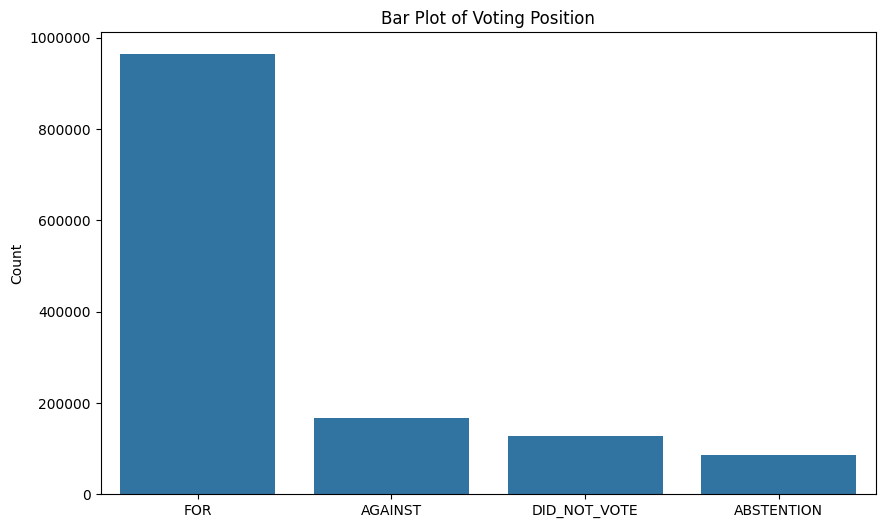

In [12]:
# Order the bars in descending order
position_order = member_votes['position'].value_counts().index

# Plotting the bar plot for position
plt.figure(figsize=(10, 6))
sns.countplot(data=member_votes, x='position', order=position_order)
plt.title('Bar Plot of Voting Position')
plt.xlabel('')
plt.ylabel('Count')

# Set y-axis to plain formatting
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.gca().yaxis.get_major_formatter().set_scientific(False)

plt.show()

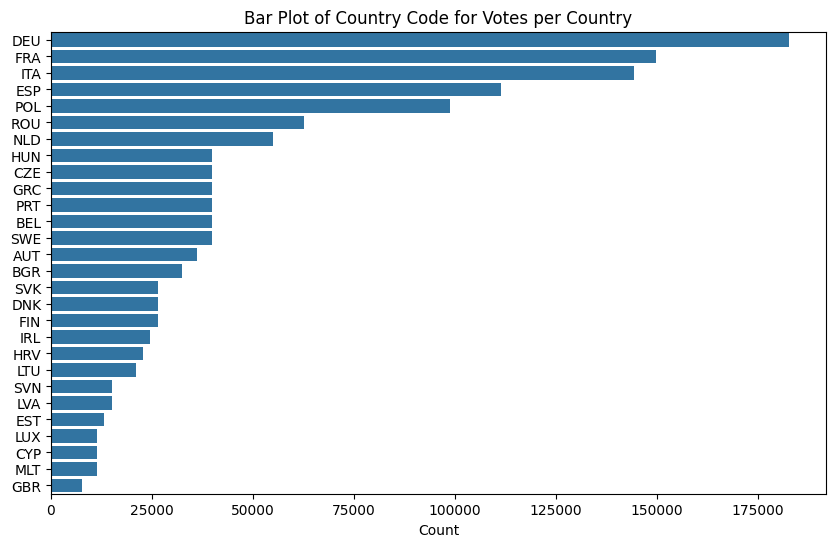

In [13]:
# Plotting the horizontal bar plot for country_code sorted in descending order
plt.figure(figsize=(10, 6))
country_code_order = member_votes['country_code'].value_counts().index
sns.countplot(data=member_votes, y='country_code', order=country_code_order)
plt.title('Bar Plot of Country Code for Votes per Country')
plt.xlabel('Count')
plt.ylabel('')

# Set x-axis to plain formatting
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.gca().xaxis.get_major_formatter().set_scientific(False)

plt.show()

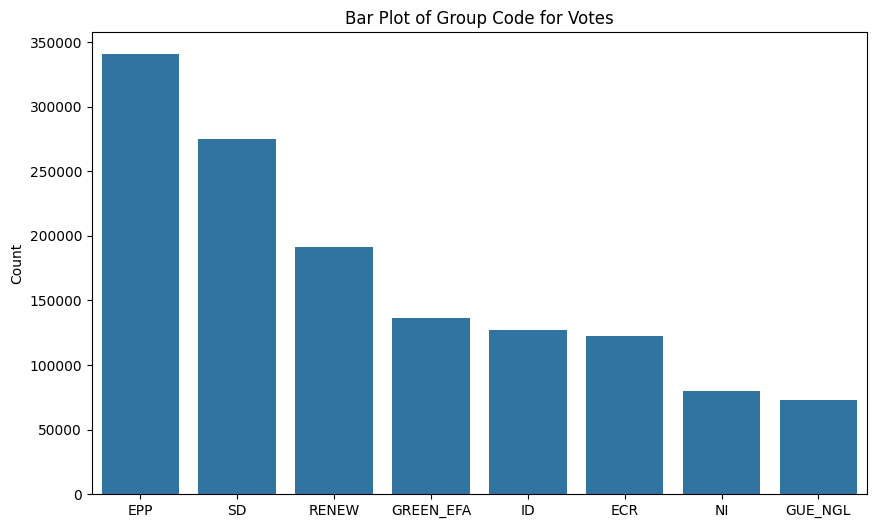

In [14]:
# Plotting the bar plot for group_code sorted in descending order
plt.figure(figsize=(10, 6))
group_code_order = member_votes['group_code'].value_counts().index
sns.countplot(data=member_votes, x='group_code', order=group_code_order)
plt.title('Bar Plot of Group Code for Votes')
plt.xlabel('')
plt.ylabel('Count')

# Set y-axis to plain formatting
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.gca().yaxis.get_major_formatter().set_scientific(False)

plt.show()

In [15]:
# Function to calculate percentage distribution
def calculate_percentage(df, group_col, value_col):
    percentage_df = df.groupby([group_col, value_col]).size().unstack(fill_value=0)
    percentage_df = percentage_df.div(percentage_df.sum(axis=1), axis=0) * 100
    return percentage_df.round(1)

# Calculate percentage distribution for country_code and group_code per voting position
country_percentage_df = calculate_percentage(member_votes, 'country_code', 'position')
group_percentage_df = calculate_percentage(member_votes, 'group_code', 'position')

# Reorder the columns
ordered_columns = ['DID_NOT_VOTE', 'AGAINST', 'ABSTENTION', 'FOR']
country_percentage_df = country_percentage_df[ordered_columns]
group_percentage_df = group_percentage_df[ordered_columns]

# Sort each column by descending percentage value and convert to a pandas Series
did_not_vote_series_country = country_percentage_df['DID_NOT_VOTE'].sort_values(ascending=False)
against_series_country = country_percentage_df['AGAINST'].sort_values(ascending=False)
abstention_series_country = country_percentage_df['ABSTENTION'].sort_values(ascending=False)
for_series_country = country_percentage_df['FOR'].sort_values(ascending=False)

did_not_vote_series_group = group_percentage_df['DID_NOT_VOTE'].sort_values(ascending=False)
against_series_group = group_percentage_df['AGAINST'].sort_values(ascending=False)
abstention_series_group = group_percentage_df['ABSTENTION'].sort_values(ascending=False)
for_series_group = group_percentage_df['FOR'].sort_values(ascending=False)

# Display the series with continuous coloring scale
def style_series(s):
    return s.to_frame().style.background_gradient(cmap='YlGnBu').format("{:.1f}%")

styled_did_not_vote_series_country = style_series(did_not_vote_series_country)
styled_against_series_country = style_series(against_series_country)
styled_abstention_series_country = style_series(abstention_series_country)
styled_for_series_country = style_series(for_series_country)

styled_did_not_vote_series_group = style_series(did_not_vote_series_group)
styled_against_series_group = style_series(against_series_group)
styled_abstention_series_group = style_series(abstention_series_group)
styled_for_series_group = style_series(for_series_group)

# Display the styled series for countries
print("DID_NOT_VOTE by Country")
display(styled_did_not_vote_series_country)
print('\n')

print("AGAINST by Country")
display(styled_against_series_country)
print('\n')

print("ABSTENTION by Country")
display(styled_abstention_series_country)
print('\n')

print("FOR by Country")
display(styled_for_series_country)
print('\n')


# Display the styled series for groups
print("DID_NOT_VOTE by Group")
display(styled_did_not_vote_series_group)
print('\n')

print("AGAINST by Group")
display(styled_against_series_group)
print('\n')

print("ABSTENTION by Group")
display(styled_abstention_series_group)
print('\n')

print("FOR by Group")
display(styled_for_series_group)

DID_NOT_VOTE by Country


,DID_NOT_VOTE
country_code,
GBR,22.7%
GRC,20.2%
HUN,17.9%
MLT,17.0%
CYP,16.3%
BGR,14.0%
ROU,13.8%
ITA,11.8%
LVA,10.1%




AGAINST by Country


,AGAINST
country_code,
GBR,19.8%
CZE,16.8%
NLD,16.3%
FRA,16.0%
SWE,15.8%
DEU,13.9%
GRC,13.3%
POL,12.8%
BEL,12.8%




ABSTENTION by Country


,ABSTENTION
country_code,
GBR,14.4%
ITA,10.8%
CZE,9.4%
HRV,8.6%
BEL,8.2%
SVK,8.0%
POL,8.0%
FRA,7.7%
GRC,7.5%




FOR by Country


,FOR
country_code,
LUX,85.8%
SVN,85.3%
PRT,79.3%
LTU,79.1%
EST,78.7%
IRL,78.2%
ESP,78.0%
ROU,76.9%
LVA,76.9%




DID_NOT_VOTE by Group


,DID_NOT_VOTE
group_code,
NI,18.7%
EPP,9.9%
GUE_NGL,9.8%
SD,9.8%
ID,9.4%
ECR,8.9%
RENEW,7.0%
GREEN_EFA,6.9%




AGAINST by Group


,AGAINST
group_code,
ID,35.5%
ECR,21.7%
NI,18.0%
GUE_NGL,17.6%
GREEN_EFA,9.7%
EPP,8.1%
RENEW,6.5%
SD,5.1%




ABSTENTION by Group


,ABSTENTION
group_code,
ID,19.6%
ECR,14.4%
GUE_NGL,12.5%
NI,11.3%
GREEN_EFA,4.3%
EPP,3.3%
RENEW,2.2%
SD,1.9%




FOR by Group


,FOR
group_code,
RENEW,84.2%
SD,83.2%
GREEN_EFA,79.1%
EPP,78.7%
GUE_NGL,60.2%
ECR,55.0%
NI,52.1%
ID,35.5%


In [16]:
# Preview the results
member_votes

,position,country_code,group_code,id_mep,id_bill
2253,FOR,LUX,RENEW,0,0
2254,FOR,GBR,RENEW,1,0
2255,DID_NOT_VOTE,DEU,SD,2,0
2256,FOR,DEU,SD,4,0
2257,FOR,DEU,SD,5,0
...,...,...,...,...,...
13571171,DID_NOT_VOTE,PRT,EPP,868,1902
13571172,DID_NOT_VOTE,PRT,EPP,869,1902
13571173,DID_NOT_VOTE,PRT,EPP,870,1902
13571174,FOR,PRT,EPP,871,1902


## 1. Exporting Dataset
<a id="Exporting-Dataset"></a>

In [17]:
# Export the member_votes dataset in its current stage to the corresponding local folder
member_votes.to_csv("../datasets/second_stage/5_member_votes/member_votes.csv", index=False)